# Nicolas Leguizamón, código: 201727960



# Leidy Araque Molina, código: 201727196

# Exercise 02

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [73]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
import zipfile
with zipfile.ZipFile('C:/Users/Nicolas L/Documents/PERSONAL NLR/UNIVERSIDAD/vacaciones 2018/DEEP LEARNING/AppliedDeepLearningClass-master/AppliedDeepLearningClass-master/datasets/income.csv.zip', 'r') as z:
    f = z.open('income.csv')
    income = pd.read_csv(f, index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [10]:
income.shape

(32561, 15)

# Exercise 2.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

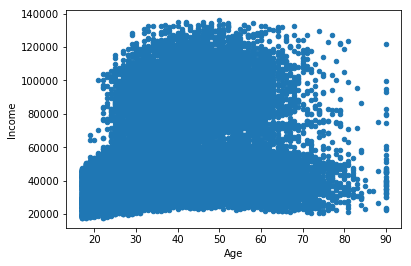

In [32]:
income.plot(x='Age', y='Income', kind='scatter')

# Desarrollo

Del diagrama de dispersión se observa que la relación entre el ingreso y la edad es incremental hasta los 30 años, a partir de esta edad es muy uniforme la distribución. Es pertinente crear un modelo de regresión que nos entregue mas información.

In [43]:
#check data
income.head(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [33]:
#preparación de la data
y = income['Income'].values
X = income['Age'].values

In [34]:

# carga de las librerias
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


In [35]:
#Reshape
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]


In [36]:
# Inicialización
linreg = LinearRegression(fit_intercept=False)

In [37]:
# Fit
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [38]:
linreg.coef_

array([ 32538.08813087,    542.16765707])

Teniendo en cuenta los coeficientes, podemos decir que para un incremento de 1 en la edad, el ingreso se incrementa en 542. lo que confirma una tendencia creciente.
A continuación vamos a evaluar el ingreso, para cuando la edad es de 30 años:

In [1]:
coef=linreg.coef_
in30= sum(([1,30])*coef)
print("income @ 30YO =", in30)

NameError: name 'linreg' is not defined

Cuando la edad es de 30 años, el modelo nos genera un ingreso de 48mil dolares

para cuando la edad es de 40 años:

In [41]:
coef=linreg.coef_
in40= sum(([1,40])*coef)
print("income @ 40YO =", in40)

income @ 40YO = 54224.7944138


Diez años despues en los 40, el ingreso se incrementó considerablemente

# Exercise 2.2
Evaluate the model using the MSE

# Desarrollo

Para poder calcular el MSE, se genera una predicción de los valores de ingreso mediante la regresión lineal

In [42]:
#import
from sklearn import metrics

In [43]:
#generando la predicción
y_pred = linreg.predict(X_)

In [77]:
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

MSE: 593783043.84



# Exercise 2.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

# Desarrollo

Vamos a generar la variable Age^2 (edad al cuadrado)

In [75]:
income['Age^2']=income['Age']**2
income.shape[0]

32561

In [76]:
#Creación de la matriz X y escalamiento de datos:
X = income[['Age', 'Age^2']].values
X[0:32561]

array([[  39, 1521],
       [  50, 2500],
       [  38, 1444],
       ..., 
       [  58, 3364],
       [  22,  484],
       [  52, 2704]], dtype=int64)

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
ss.mean_, ss.scale_

(array([   38.58164676,  1674.59915236]),
 array([   13.64022309,  1179.02941609]))

In [47]:
X_ = np.c_[np.ones(n_samples), X]
X_[0:5]

array([[ 1.        ,  0.03067056, -0.13027593],
       [ 1.        ,  0.83710898,  0.70006807],
       [ 1.        , -0.04264203, -0.19558388],
       [ 1.        ,  1.05704673,  0.96214804],
       [ 1.        , -0.77576787, -0.75536635]])

Vamos a hallar los betas de las ecuaciones normales (OLS)

In [48]:
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([ 53455.8091582 ,  42718.04340395, -36011.57934338])

# Exercise 2.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [90]:
income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income,Age^2
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0,1521
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0,2500
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0,1444
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0,2809
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0,784


# Desarrollo

In [49]:
#carga de las librerias
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

Posterior a la carga de las librerias vamos a generar un modelo, ingresando mas variables, escogemos las variables numericas para tal fin

In [80]:
lr.fit(income[['Age', 'fnlwgt', 'Education-Num', 'Age^2']], income['Income'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

a fin de comparar el desempeño del modelo multivariado, vamos a generar el vector de predicciones para calcular el MSE

In [81]:
yy_pred=lr.predict(income[['Age', 'fnlwgt', 'Education-Num', 'Age^2']])

In [82]:
print('MSEUV:', metrics.mean_squared_error(income['Income'], y_pred))
print('MSEMV:', metrics.mean_squared_error(income['Income'], yy_pred))


MSEUV: 593783043.84
MSEMV: 451236627.113


El denominado MSUV, es el del modelo univariado. el MSMV el del multivariado, se observa un incremento en el modelo multivariado, lo que indica que el desempeño del modelo mejora con la inclusión de mas variables

# Exercise 2.5


Estimate a logistic regression to predict if a person is in the United States.

What is the performance of the model

# Desarrollo

se codifica como binaria la variable de pais para poder generar la regresión

In [77]:
income['isUS'] = (income['Country'] == 'United-States')*1.0
income['isUS'].value_counts()

1.0    29170
0.0     3391
Name: isUS, dtype: int64

A continuación se manipulan los datos para poder correr el LOGIT

In [78]:
# define X and y
#eliminamos la columna de pais para X
del income ['Country']
#se crean las Dummies
income1 = pd.get_dummies(income)
income1.head

feature_cols = ['Age', 'fnlwgt', 'Education-Num' , 'Hours per week', 'Age^2']
X = income[feature_cols]
y = income['isUS']
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Vamos a revisar el desempeño del modelo generado:

In [79]:
logreg.score(X,y)

0.89585700684868397